<a href="https://colab.research.google.com/github/borifgido/Borif_SPARK2024/blob/main/Multiple_Linear_Regression_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Beta value using Numpy

from numpy.linalg import inv
from numpy import dot, transpose


x = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]

print(dot(inv(dot(transpose(x), x)), dot(transpose(x), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [ ]:
#NumPy also provides a least squares function that can solve for the values of the
#parameters more compactly
from numpy.linalg import lstsq

x = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]

print(lstsq(x,y)[0])

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


<ipython-input-2-95eef4c04604>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  print(lstsq(x,y)[0])


In [ ]:
#Let's update our pizza price predictor program to use the second explanatory variable and
#compare its performance on the test set to that of the simple linear regression model

from sklearn.linear_model import LinearRegression

x = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]

model = LinearRegression()
model.fit(x,y)

x_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]


predictions = model.predict(x_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(x_test, y_test))

Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


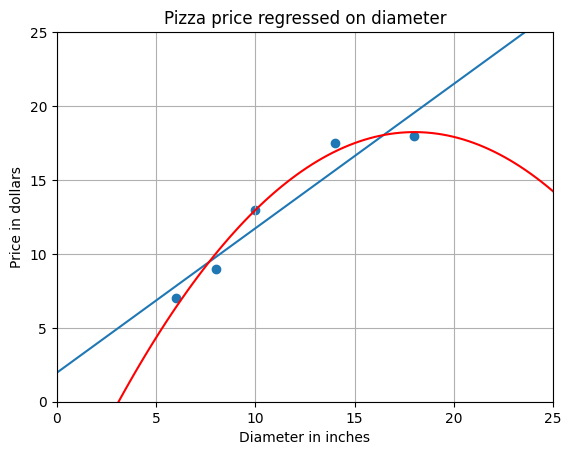

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]


In [ ]:
#Polynomial Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]

X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='-')

plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')

plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)

In [ ]:
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345054


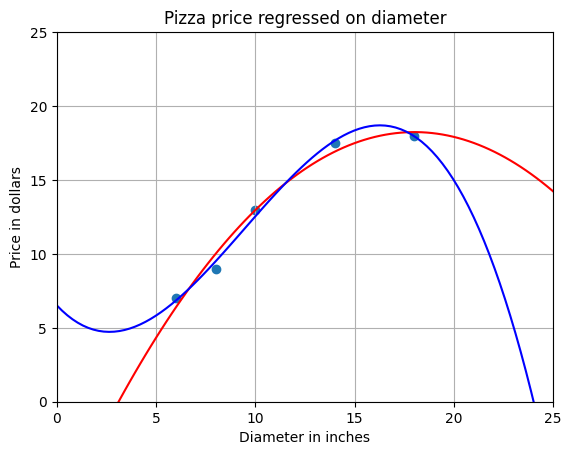

In [ ]:
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

polynomial_featurizer = PolynomialFeatures(degree=3)
X_train_polynomial = polynomial_featurizer.fit_transform(X_train)
X_test_polynomial = polynomial_featurizer.transform(X_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)

regressor_polynomial = LinearRegression()
regressor_polynomial.fit(X_train_polynomial, y_train)

xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='-')

xx_polynomial = polynomial_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_polynomial.predict(xx_polynomial), c='b', linestyle='-')

plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')

plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()


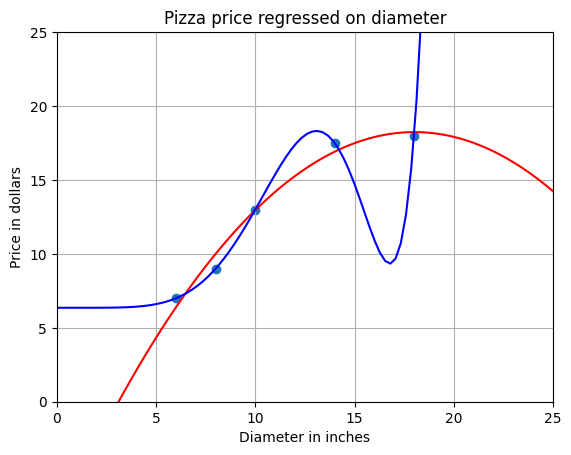

In [ ]:
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

polynomial_featurizer = PolynomialFeatures(degree=9)
X_train_polynomial = polynomial_featurizer.fit_transform(X_train)
X_test_polynomial = polynomial_featurizer.transform(X_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)

regressor_polynomial = LinearRegression()
regressor_polynomial.fit(X_train_polynomial, y_train)

xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='-')

xx_polynomial = polynomial_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_polynomial.predict(xx_polynomial), c='b', linestyle='-')

plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')

plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()